# Introducción 

En este notebook dr presenta la solución a la impmentación de dos figuras paramétricas en 3D (Toride y esfera), así como la trasladación y rotación de las mismas. A su vez se implementa un plano para representarlo en 3D.


# Desarrollo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

1 . **Implemente un toroide en 3D con origen en (a, b, c)**

a. Traslade el toroide a la coordenada (h,k,l) 

b. Rotar con respecto de X  a 45°

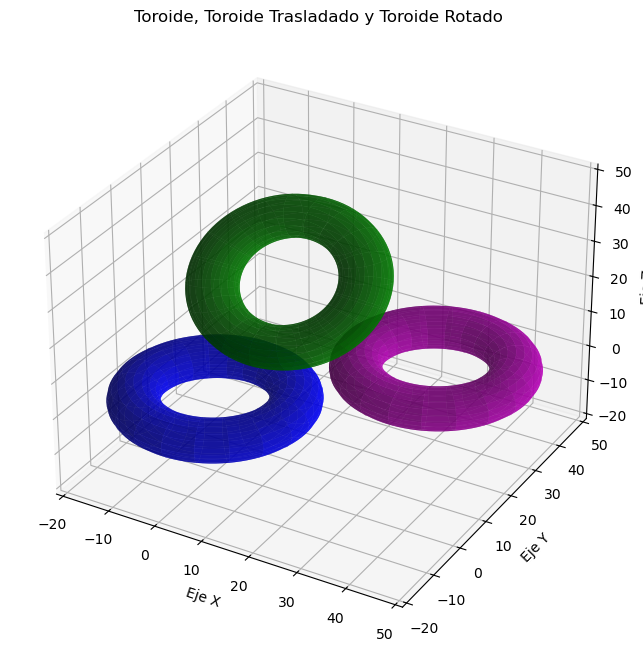

In [34]:
### TOROIDE ###

# Definimos las ecuaciones paramétricas del toroide
def f(u, v, R, r):
    return (R + r * np.cos(u)) * np.cos(v)

def g(u, v, R, r):
    return (R + r * np.cos(u)) * np.sin(v)

def h(u, r):
    return r * np.sin(u)

# Parametros para el toroide
R = 15  # Radio mayor
r = 5   # Radio menor

# Creamos la malla de valores
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, 2 * np.pi, 100)
u, v = np.meshgrid(u, v)

# Calculamos las coordenadas del toroide
x = f(u, v, R, r)
y = g(u, v, R, r)
z = h(u, r)

### TOROIDE TRASLADADO ###

# Definimos las ecuaciones paramétricas para trasladar el toroide
def fp(u, v, R, r, h):
    return R * np.cos(v) + r * np.cos(u) * np.cos(v) + h

def gp(u, v, R, r, k):
    return R * np.sin(v) + r * np.cos(u) * np.sin(v) + k

def hp(u, r, l):
    return r * np.sin(u) + l

# Traslación del toroide a las coordenadas (h, k, l)
h = 30  # Traslación en el eje X
k = 30  # Traslación en el eje Y
l = 0  # Traslación en el eje Z

# Calculamos las coordenadas del toroide trasladado
x_t = fp(u, v, R, r, h)
y_t = gp(u, v, R, r, k)
z_t = hp(u, r, l)

### TOROIDE ROTADO ###

#Definimos las funciones para calcular la rotación de 45 grados alrededor del eje x
def rotate_x_45_degrees(u, v, R, r):
    # Convertimos 45 grados a radianes
    theta = np.pi / 4
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    
    # Calculamos las nuevas coordenadas tras la rotación
    x = (R + r * np.cos(u)) * np.cos(v)
    y = (R + r * np.cos(u)) * np.sin(v) * cos_theta - r * np.sin(u) * sin_theta
    z = (R + r * np.cos(u)) * np.sin(v) * sin_theta + r * np.sin(u) * cos_theta
    return x, y, z

# Usamos las funciones para calcular la posición del toroide rotado
x_rotated, y_rotated, z_rotated = rotate_x_45_degrees(u, v, R, r)

# Añadimos 10 a cada coordenada para desplazar el toroide rotado en el espacio
x_rotated += 10
y_rotated += 10
z_rotated += 30

# Creamos la figura y el eje para la gráfica que incluirá todos los toroides
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficamos el toroide original
ax.plot_surface(x, y, z, color='b', rstride=5, cstride=5, alpha=0.7, edgecolor='none')

# Graficamos el toroide trasladado
ax.plot_surface(x_t, y_t, z_t, color='m', rstride=5, cstride=5, alpha=0.7, edgecolor='none')

# Graficamos el toroide rotado y trasladado
ax.plot_surface(x_rotated, y_rotated, z_rotated, color='g', rstride=5, cstride=5, alpha=0.7, edgecolor='none')

# Configuramos los límites del gráfico para que el desplazamiento sea más notable
ax.set_xlim([-20, 50])
ax.set_ylim([-20, 50])
ax.set_zlim([-20, 50])

# Etiquetas de los ejes
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')

# Título de la gráfica
ax.set_title('Toroide, Toroide Trasladado y Toroide Rotado')

# Mostramos la gráfica
plt.show()

2 . **Implemente un esfera en 3D con origen en (a, b, c)**

a. Traslade la esfera a la coordenada (h,k,l)

b. Rotar con respecto de X a 50°

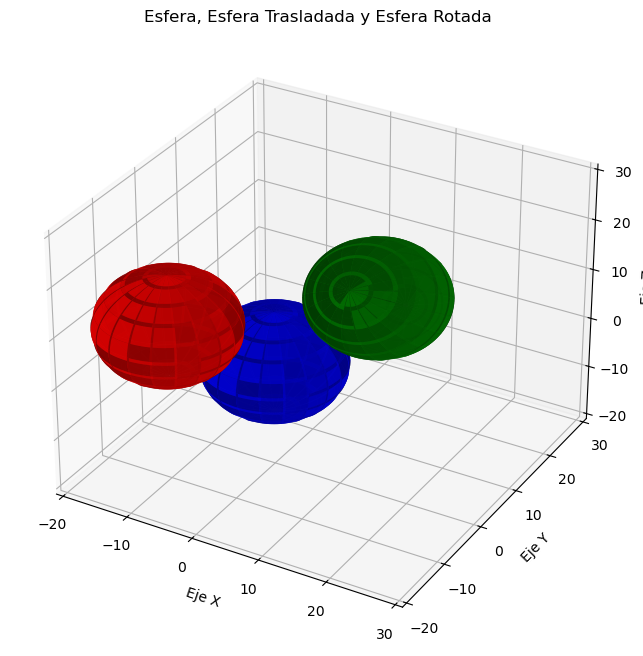

In [36]:
### ESFERA ###

# Definimos las ecuaciones paramétricas para la esfera
def sphere(u, v, radius):
    x = radius * np.sin(u) * np.cos(v)
    y = radius * np.sin(u) * np.sin(v)
    z = radius * np.cos(u)
    return x, y, z

# Radio de la esfera
radius = 10

# Creamos la esfera 
x_sphere, y_sphere, z_sphere = sphere(u, v, radius)

### ESFERA TRASLADADA ###

# Definimos la función para aplicar la traslación hkl a la esfera
def translate_sphere(x, y, z, h, k, l):
    return x + h, y + k, z + l

# Coordenadas de traslación hkl
h, k, l = -10, -10, 10

# Ahora trasladamos la esfera original en hkl 
x_sphere_translated, y_sphere_translated, z_sphere_translated = translate_sphere(
    x_sphere, y_sphere, z_sphere, h, k, l)

### ESFERA ROTADA ###

# Definimos la función para rotar la esfera 50 grados alrededor del eje x
def rotate_x_50_degrees(u, v, radius):
    # Convertimos 50 grados a radianes
    theta = np.radians(50)
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    
    # Coordenadas sin rotar
    x, y, z = sphere(u, v, radius)
    
    # Aplicamos la rotación
    y_rotated = y * cos_theta - z * sin_theta
    z_rotated = y * sin_theta + z * cos_theta
    return x, y_rotated, z_rotated

# Usamos la función para calcular la posición de la esfera rotada
x_rotated_sphere, y_rotated_sphere, z_rotated_sphere = rotate_x_50_degrees(u, v, radius)

# Trasladamos la esfera rotada en el espacio
x_rotated_sphere += 10
y_rotated_sphere += 10
z_rotated_sphere += 10

# Creamos una nueva figura y eje para la gráfica que incluirá la esfera original y la rotada
fig_sphere = plt.figure(figsize=(12, 8))
ax_sphere = fig_sphere.add_subplot(111, projection='3d')

# Graficamos la esfera original
ax_sphere.plot_surface(x_sphere, y_sphere, z_sphere, color='b', rstride=5, cstride=5, alpha=0.7, edgecolor='none')

# Graficamos la esfera rotada 
ax_sphere.plot_surface(x_rotated_sphere, y_rotated_sphere, z_rotated_sphere, color='g', rstride=5, cstride=5, alpha=0.7, edgecolor='none')

# Graficamos la esfera trasladada
ax_sphere.plot_surface(x_sphere_translated, y_sphere_translated, z_sphere_translated, color='r', rstride=5, cstride=5, alpha=0.7, edgecolor='none')

# Configuramos los límites del gráfico para acomodar ambas esferas
ax_sphere.set_xlim([-20, 30])
ax_sphere.set_ylim([-20, 30])
ax_sphere.set_zlim([-20, 30])

# Etiquetas de los ejes
ax_sphere.set_xlabel('Eje X')
ax_sphere.set_ylabel('Eje Y')
ax_sphere.set_zlabel('Eje Z')

# Título de la gráfica
ax_sphere.set_title('Esfera, Esfera Trasladada y Esfera Rotada')

# Mostramos la gráfica con ambas esferas
plt.show()


3 . **Implemente un plano con origen en R0(x0, y0, z0) y normal en N=n1i+n2j+n3k**

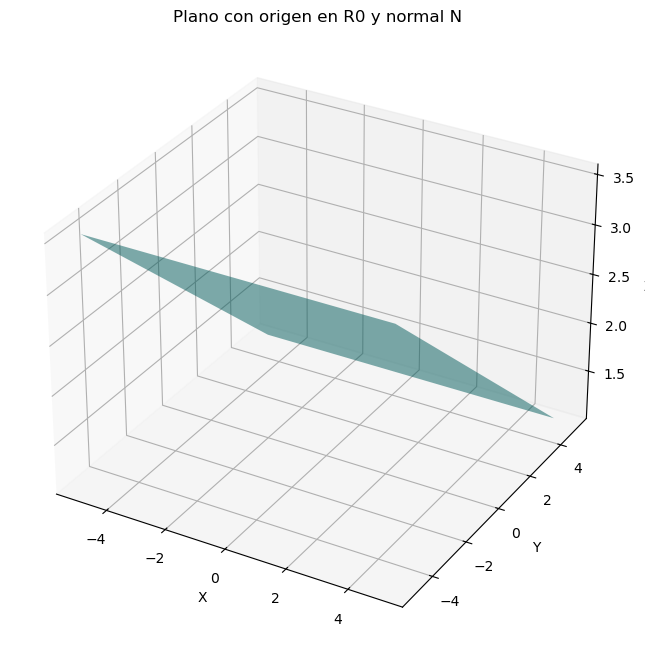

In [38]:
# Función para graficar un plano dado su punto de origen R0 y su vector normal N
def plot_plane(ax, R0, N, domain_x, domain_y, color):
    # Creamos una malla de puntos en el dominio del plano
    X, Y = np.meshgrid(domain_x, domain_y)
    
    # Calculamos los valores de Z en el plano usando la ecuación del plano
    # n1*(x - x0) + n2*(y - y0) + n3*(z - z0) = 0 => z = (n1*(x0 - x) + n2*(y0 - y) + n3*z0) / n3
    Z = (N[0]*(R0[0] - X) + N[1]*(R0[1] - Y) + N[2]*R0[2]) / N[2]
    
    # Graficamos el plano
    ax.plot_surface(X, Y, Z, alpha=0.5, rstride=100, cstride=100, color=color)

# Definimos el punto de origen R0 y el vector normal N
R0 = np.array([2.3, 0, 2.3])
N = np.array([0, 0.5, 2])

# Creamos la figura y los ejes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Establecemos el dominio para X y Y
domain_x = np.linspace(-5, 5, 10)
domain_y = np.linspace(-5, 5, 10)

# Creamos una malla de puntos en el dominio del plano
X, Y = np.meshgrid(domain_x, domain_y)

# Calculamos los valores de Z en el plano usando la ecuación del plano
# n1*(x - x0) + n2*(y - y0) + n3*(z - z0) = 0 => z = (n1*(x0 - x) + n2*(y0 - y) + n3*z0) / n3
Z = (N[0]*(R0[0] - X) + N[1]*(R0[1] - Y) + N[2]*R0[2]) / N[2]

# Graficamos el plano con el punto de origen y el vector normal dados
plot_plane(ax, R0, N, domain_x, domain_y, 'teal')

# Establecemos las etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Título del gráfico
ax.set_title('Plano con origen en R0 y normal N')

# Mostramos la gráfica
plt.show()


# Conclusiones

Coon estos ejercicios pudimos poner en práctica conceptos como la creación de figuras paramétricas y además aplicar transformación geométrica como la que habíamos visto previamente con figuras 2D pero esta vez a planos 3D. Además pudimos introducirnos a la creación de planos en el espacio tridimensional que nos servirá para futuras prácticas donde realizaremos proyecciones respecto a ese plano

### Referencias Bibliográficas

Xiang, Z., & Plastock, R. A. (2000). Schaum’s Outline of Computer Graphics 2/E. McGraw Hill Professional.